In [1]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot
from bokeh.models import ContinuousColorMapper
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline


def clamp(x): 
  return max(0, min(x, 255))

In [2]:
df = pd.read_csv("carDataClean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32596 entries, 0 to 32595
Data columns (total 19 columns):
price             32596 non-null int64
miles             32596 non-null int64
fuel_type         32596 non-null object
exterior_color    32357 non-null object
interior_color    28987 non-null object
drivetrain        32596 non-null object
transmission      32596 non-null object
engine            32596 non-null object
VIN               32594 non-null object
name              32596 non-null object
sellerAddress     32596 non-null object
id                32596 non-null int64
modelName         32596 non-null object
diesel            32596 non-null bool
turbo             32596 non-null bool
hybrid            32596 non-null bool
used              32596 non-null bool
year              32596 non-null int64
make              32596 non-null object
dtypes: bool(4), int64(4), object(11)
memory usage: 3.9+ MB


In [3]:
# Print all availible car models in this dataset
df['modelName'].unique()

array(['C-Max Hybrid', 'Ranger', 'F-150', 'Transit-250', 'Escape',
       'Thunderbird', 'Focus ST', 'Focus', 'Expedition EL', 'Edge',
       'Fusion Hybrid', 'Shelby GT350', 'Model Unknown', 'E150', 'Taurus',
       'Transit Connect', 'Excursion', 'Crown Victoria', 'Explorer',
       'Five Hundred', 'Flex', 'Transit-350', 'E350 Super Duty',
       'Expedition', 'F-350', 'Freestar', 'Fusion Energi', 'Fiesta',
       'Expedition Max', 'C-Max Energi', 'Fusion', 'Explorer Sport Trac',
       'Freestyle', 'E250', 'EcoSport', 'E350', 'Mustang', 'Transit-150',
       'F-250'], dtype=object)

In [4]:
# Create a unique dataframe for each of the most popular Ford Models
popularModels = ['F-150', 'F-250', 'Escape', 'Focus', 'Taurus', 'Explorer', 'Expedition', 'Fusion', 'Mustang']
popularModels_Df = {key: df[df['modelName'] == key] for key in popularModels}

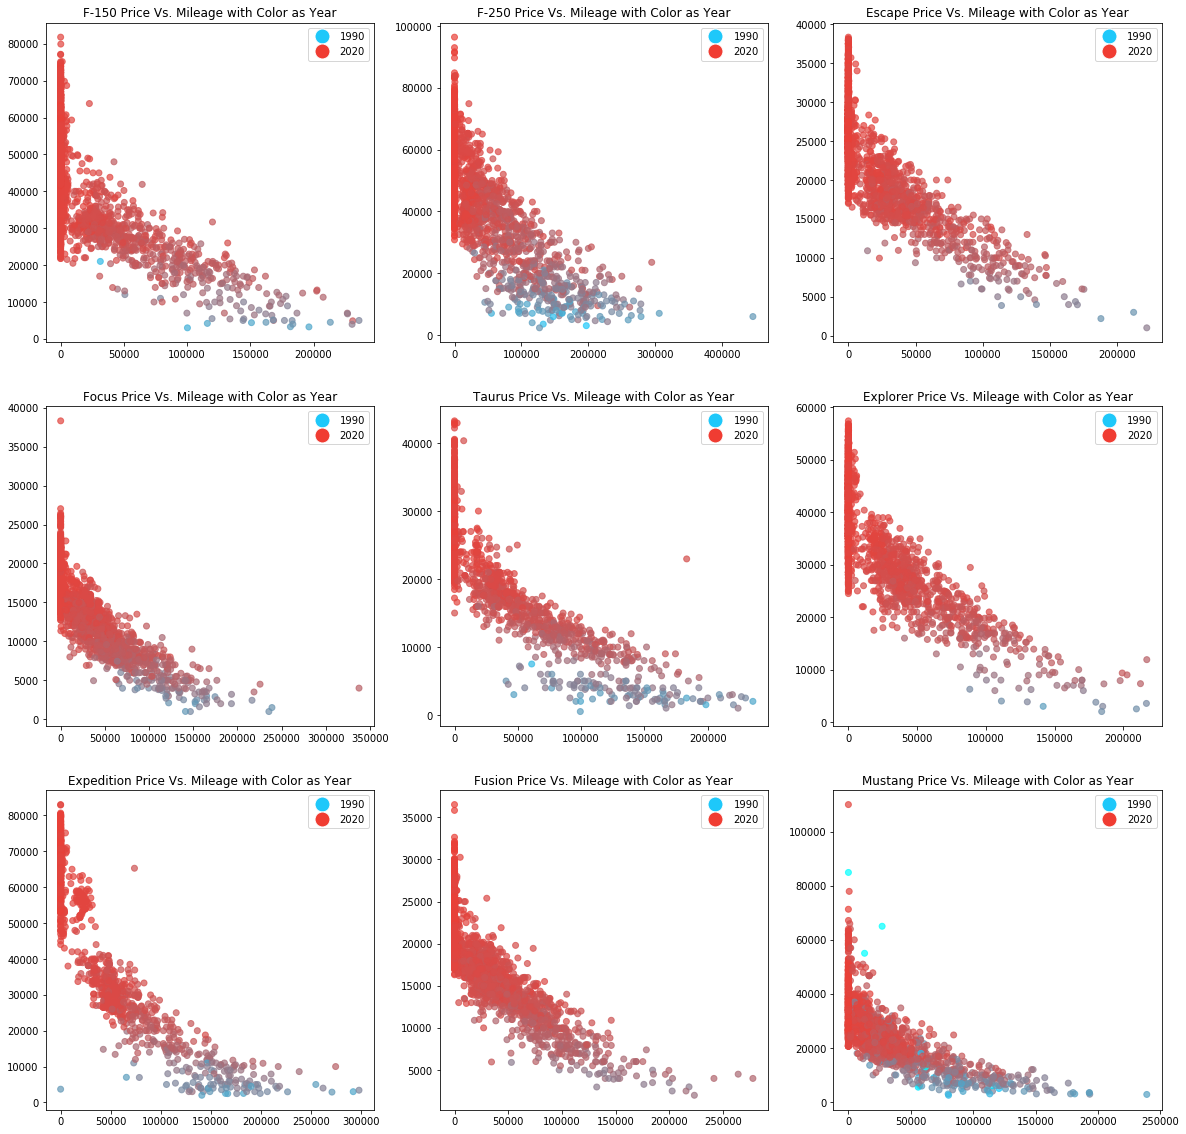

In [6]:
fig = plt.figure(figsize=(20,20))

i = 1
for modelName, model_df in popularModels_Df.items():
    ax = plt.subplot(3, 3, i)
    
    # Create color map for each data point
    red = [int(30 + ((float(year) - 1990.0) * (210.0 / 30.0))) for year in model_df['year']]
    green = [int(200 + ((float(year) - 1990.0) * (-140.0 / 30.0))) for year in model_df['year']]
    blue = [int(250 + ((float(year) - 1990.0) * (-200.0 / 30.0))) for year in model_df['year']]
    colors = ['#%02x%02x%02x' % (clamp(red[i]), clamp(green[i]), clamp(blue[i])) for i in range(0, len(red))]
    
    # Add title
    title = modelName + " Price Vs. Mileage with Color as Year"
    ax.title.set_text(title)
    
    # Add custom legend
    Marker_1990 = mlines.Line2D([], [], color='white', markerfacecolor='#1ec8fa',markersize=15, marker='o')
    Marker_2020 = mlines.Line2D([], [], color='white', markerfacecolor='#f03c32', markersize=15, marker='o')
    handles = [Marker_1990, Marker_2020]
    labels = ['1990', '2020']
    ax.legend(handles=handles, labels=labels)
    
    plt.scatter(x=model_df['miles'], y=model_df['price'], color=colors, alpha=0.7)
    
    i += 1
    
plt.show()